<a href="https://colab.research.google.com/github/luismerinou/final-degree-project-UPM/blob/main/PFG_LuisMerinoUlizarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python --version

Python 3.7.13


# Implementación modelo

## Carga de datos e imports

In [ ]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential


In [ ]:
# Directorio raíz de trabajo
PATH = '/content/drive/MyDrive/colab-workdir'

In [ ]:
tf.keras.backend.clear_session()  # Para restablecer fácilmente el estado del portátil.
transfer_load_model = keras.models.load_model(f'{PATH}/saved_models/last_model-colab-data-augmentation-new-test.h5')

## Load train and test CSV

In [ ]:
train_dir = f'{PATH}/jpeg224/train'
val_dir = f'{PATH}/jpeg224/val'
test_dir = f'{PATH}/jpeg224/test'

In [ ]:
train = pd.read_csv(f'{PATH}/train.csv')
train

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [ ]:
benign_dir = os.listdir( f'{PATH}/train_copy/0')
benign_dir

In [ ]:
malignant_dir = os.listdir( f'{PATH}/train_copy/1')
malignant_dir

In [ ]:
traindf_length = len(train.index)
traindf_length

33126

In [ ]:
five_percent_of_train = round(traindf_length*0.05)
five_percent_of_train

1656

In [ ]:
test_slice = train[:five_percent_of_train]
test_slice

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
1651,ISIC_0597414,IP_2606884,female,45.0,lower extremity,unknown,benign,0
1652,ISIC_0597581,IP_9494136,female,75.0,lower extremity,unknown,benign,0
1653,ISIC_0599047,IP_4109313,male,30.0,upper extremity,unknown,benign,0
1654,ISIC_0599605,IP_6130936,male,70.0,upper extremity,melanoma,malignant,1


In [ ]:
test_slice["image_name"]

0       ISIC_2637011
1       ISIC_0015719
2       ISIC_0052212
3       ISIC_0068279
4       ISIC_0074268
            ...     
1651    ISIC_0597414
1652    ISIC_0597581
1653    ISIC_0599047
1654    ISIC_0599605
1655    ISIC_0599755
Name: image_name, Length: 1656, dtype: object

In [ ]:
mask = test_slice["target"]==1
test_malignant = test_slice[mask]
test_malignant

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
475,ISIC_0250839,IP_6234053,male,75.0,head/neck,melanoma,malignant,1
544,ISIC_0272509,IP_0408084,female,35.0,lower extremity,melanoma,malignant,1
546,ISIC_0273046,IP_3293726,male,80.0,torso,melanoma,malignant,1
551,ISIC_0274382,IP_7600629,male,65.0,torso,melanoma,malignant,1
558,ISIC_0275828,IP_7252102,male,30.0,lower extremity,melanoma,malignant,1


In [ ]:
test_benign = test_slice[~mask]
test_benign

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
1650,ISIC_0597158,IP_4382720,female,50.0,lower extremity,unknown,benign,0
1651,ISIC_0597414,IP_2606884,female,45.0,lower extremity,unknown,benign,0
1652,ISIC_0597581,IP_9494136,female,75.0,lower extremity,unknown,benign,0
1653,ISIC_0599047,IP_4109313,male,30.0,upper extremity,unknown,benign,0


In [ ]:
benign_image_names = test_benign["image_name"].tolist()

for i in range(len(benign_image_names)):
    benign_image_names[i] += ".jpg"
benign_image_names

In [ ]:
import shutil
#move BENING TRAIN images to benign est folder
original_source = f"{PATH}/train_copy/0/"
destination = f"{PATH}/test/0"

source = original_source

for img in benign_image_names:
  if(img in benign_dir):
    source += img
    print("Source path with img: " + source)
    shutil.move(source, destination)
    source = source.replace(source, original_source)
    print("Source path without  img: " + source)

## malignant

In [ ]:
malignant_image_names = test_malignant["image_name"].tolist()

for i in range(len(malignant_image_names)):
    malignant_image_names[i] += ".jpg"
malignant_image_names

In [ ]:
import shutil
#move MALIGNANT TRAIN images to malignant test folder
original_source = f"{PATH}/train_copy/1/"
destination = f"{PATH}/test/1"

source = original_source

for img in malignant_image_names:
  if(img in malignant_dir):
    source += img
    shutil.move(source, destination)
    source = source.replace(source, original_source)

## benign - malignant balance

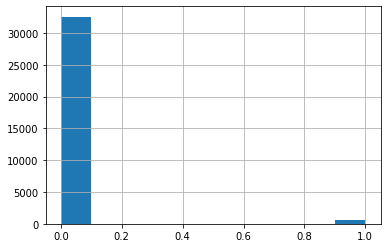

In [ ]:
train['target'].hist()

In [ ]:
train['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [ ]:
32542/33126, 584/33126

(0.9823703435367989, 0.01762965646320111)

el 98.23% de las imagenes del dataset son imágenes con la etiqueta cero y el 1.76% de las imágenes tienen la etiqueta 1

In [ ]:
counts = np.bincount(train['target'])
print(
    "Number of malignant samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train)
    )
)

print(
    "Number of benign samples in training data: {} ({:.2f}% of total)".format(
        counts[0], 100 * float(counts[0]) / len(train)
    )
)

benign_samples = 1.0 / counts[0]
malignant_samples = 1.0 / counts[1]

Number of malignant samples in training data: 584 (1.76% of total)
Number of benign samples in training data: 32542 (98.24% of total)


In [ ]:
train_classes = train['target']
train_classes

0        0
1        0
2        0
3        0
4        0
        ..
33121    0
33122    0
33123    0
33124    0
33125    0
Name: target, Length: 33126, dtype: int64

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes= np.unique(train_classes),
                                                 y=train_classes)

class_weights_dict = dict(enumerate(class_weights))


In [ ]:
class_weights, class_weights_dict

(array([ 0.50897302, 28.36130137]),
 {0: 0.5089730194825149, 1: 28.361301369863014})

## Load datasets

In [ ]:
train_dir = f'{PATH}/jpeg224/train'
val_dir = f'{PATH}/jpeg224/val'
test_dir = f'{PATH}/jpeg224/test'

In [ ]:
IMG_SHAPE = 224
BATCH_SIZE = 200

In [ ]:
train_image_gen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
)

train_data_gen = train_image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory = train_dir,
                                                     shuffle= True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'binary')

val_data_gen = ImageDataGenerator(rescale=1 / 255.0)


val_data_gen = val_data_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory = val_dir,
                                                     shuffle= True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'binary')

Found 28821 images belonging to 2 classes.
Found 2649 images belonging to 2 classes.


# Crear directorio predict dentro de test

In [ ]:
test_directory = f'{PATH}/jpeg224/test'
os.listdir(test_directory)

['0', '1']

In [ ]:
test_image_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_gen.flow_from_directory(batch_size = BATCH_SIZE,
                                                   directory = test_directory,
                                                   shuffle= True,
                                                   target_size = (IMG_SHAPE, IMG_SHAPE),
                                                   class_mode='binary')

Found 1656 images belonging to 2 classes.


In [ ]:
type(test_image_gen)

keras.preprocessing.image.ImageDataGenerator

# VGG16

In [ ]:

INPUT_SHAPE = (224, 224, 3)

vgg16_model = VGG16(weights='imagenet',
                    input_shape=INPUT_SHAPE,
                    include_top=False)

for layer in vgg16_model.layers:
  print(layer.name)
  layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
x = vgg16_model.output
x = tf.keras.layers.Flatten()(x) # Flatten dimensions to for use in fully connected layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = tf.keras.layers.Dense(2, activation='softmax')(x)
model = Model(inputs=vgg16_model.input, outputs=x)

NameError: ignored

In [ ]:
model.compile(optimizer='adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(), #Computes the crossentropy loss between the labels and predictions.
                       metrics=["accuracy"])

## Entrenamiento del modelo

In [ ]:
model_to_fit = model

In [ ]:
BATCH_SIZE = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.000015,
                                                  patience=6, restore_best_weights=True, verbose=1)

vgg_classifier = model_to_fit.fit(train_data_gen,
                                     validation_data=val_data_gen,
                                     steps_per_epoch=50,
                                     epochs=50,
                                     class_weight=class_weights_dict,
                                     callbacks=[early_stopping]
                                    )

Epoch 1/50
50/50 [==============================] - 2441s 49s/step - loss: 5.8215 - accuracy: 0.5022 - val_loss: 0.2728 - val_accuracy: 0.9253
Epoch 2/50
50/50 [==============================] - 1232s 25s/step - loss: 3.6722 - accuracy: 0.4884 - val_loss: 1.0311 - val_accuracy: 0.0891
Epoch 3/50
50/50 [==============================] - 980s 20s/step - loss: 1.3610 - accuracy: 0.4762 - val_loss: 0.9756 - val_accuracy: 0.0461
Epoch 4/50
50/50 [==============================] - 856s 17s/step - loss: 0.8960 - accuracy: 0.4670 - val_loss: 0.6194 - val_accuracy: 0.7554
Epoch 5/50
50/50 [==============================] - 703s 14s/step - loss: 0.7230 - accuracy: 0.4726 - val_loss: 0.7973 - val_accuracy: 0.4621
Epoch 6/50
50/50 [==============================] - 580s 12s/step - loss: 0.7722 - accuracy: 0.2695 - val_loss: 0.7108 - val_accuracy: 0.1601
Epoch 7/50
50/50 [==============================] - 484s 10s/step - loss: 0.7312 - accuracy: 0.1346 - val_loss: 0.8813 - val_accuracy: 0.0713
Epoc

In [ ]:
class_weights

array([ 0.50897302, 28.36130137])

In [ ]:
model_to_fit.save(f'{PATH}/saved_models/last_model-colab-data-augmentation-new-test.h5')

## test & evaluate

In [ ]:
test_scores = model_to_fit.evaluate(test_data_gen, verbose=1, use_multiprocessing=True, workers=4)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

17/17 [==============================] - 141s 9s/step - loss: 0.2795 - accuracy: 0.9197
Test loss: 0.2794886827468872
Test accuracy: 0.9196860194206238


## plot history

In [ ]:
! pip install plot_keras_history

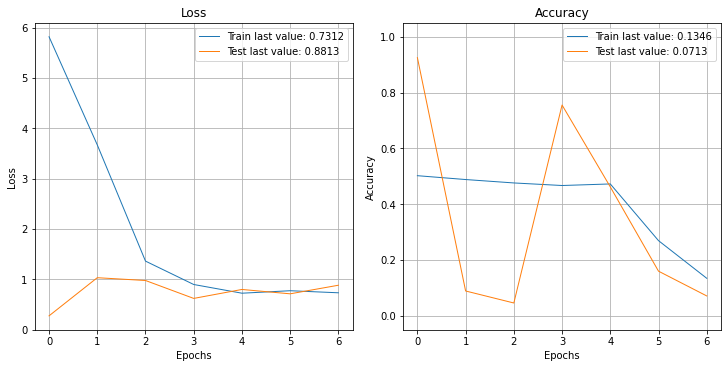

In [ ]:
# external package plot_keras_history (https://pypi.org/project/plot-keras-history/)
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(vgg_classifier)
plot_history(vgg_classifier, path="early_loss_and_accuracy.png")
plt.close()





## Predicted values

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


predictions = model_to_fit.predict(test_data_gen, verbose=1, use_multiprocessing=True, workers=4)
predictions

17/17 [==============================] - 5s 251ms/step


array([[0.89053357, 0.10946643],
       [0.5745462 , 0.4254538 ],
       [0.9152769 , 0.08472305],
       ...,
       [0.7356332 , 0.26436684],
       [0.9101687 , 0.08983129],
       [0.9079583 , 0.09204171]], dtype=float32)

In [ ]:
predictions.shape

In [ ]:
predicted_classes = np.argmax(predictions, axis=1) #Returns the indices of the maximum values along an axis.

predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

## Confusion matrix

In [ ]:
true_labels = test_data_gen.labels

In [ ]:
cf_matrix = confusion_matrix(true_labels, predicted_classes)
print(cf_matrix)

[[1519  112]
 [  23    2]]


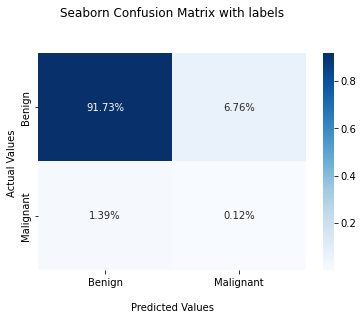

In [ ]:
plot_cf_matrix = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
plot_cf_matrix.set_title('Seaborn Confusion Matrix with labels\n\n');
plot_cf_matrix.set_xlabel('\nPredicted Values')
plot_cf_matrix.set_ylabel('Actual Values ');
plot_cf_matrix.xaxis.set_ticklabels(['Benign','Malignant'])
plot_cf_matrix.yaxis.set_ticklabels(['Benign','Malignant'])
## Display the visualization of the Confusion Matrix.
plt.show()